# Notebook for computational research analysis

In [438]:
import numpy as np
import pandas as pd
import sklearn as sk
import statsmodels.api as sm
import plotly.express as px
import statsmodels.tsa.api
from statsmodels.tsa.api import VAR

In [439]:
comp_data = pd.read_csv('comp_data.csv')

In [440]:
comp_data['category'] = comp_data['category'].replace('Computation and Language (Legacy category)', 'Computation and Language (Natural Language Processing)')
print(pd.unique(comp_data['category']))

['Artificial Intelligence'
 'Computation and Language (Natural Language Processing)'
 'Distributed, Parallel, and Cluster Computing'
 'Neural and Evolutionary Computing' 'Computer Science and Game Theory'
 'Computer Vision and Pattern Recognition' 'Computational Physics']


## Question 1 

In [441]:
cat_year_num = comp_data.groupby(['category', 'year']).count()['Unnamed: 0'].reset_index(name = "count")
print(pd.unique(cat_year_num.category))

['Artificial Intelligence'
 'Computation and Language (Natural Language Processing)'
 'Computational Physics' 'Computer Science and Game Theory'
 'Computer Vision and Pattern Recognition'
 'Distributed, Parallel, and Cluster Computing'
 'Neural and Evolutionary Computing']


In [442]:
default = px.colors.qualitative.Plotly

color_dict = {'Computation and Language (Natural Language Processing)': default[1], 'Computational Physics':default[2], 'Computer Science and Game Theory':default[3],'Computer Vision and Pattern Recognition':default[4], 'Distributed, Parallel, and Cluster Computing':default[5], 'Neural and Evolutionary Computing':default[6], 'Artificial Intelligence':default[0]}

### Bar plots for individual computational topics

In [443]:
top = 'Computation and Language (Natural Language Processing)'
px.bar(cat_year_num.query("category == @top"), x = 'year', y = 'count', title= top + " Papers by Year", color_discrete_sequence=[color_dict[top]])

In [444]:
top = 'Computational Physics'
px.bar(cat_year_num.query("category == @top"), x = 'year', y = 'count', title= top + " Papers by Year", color_discrete_sequence=[color_dict[top]])

In [445]:
top = 'Computer Science and Game Theory'
px.bar(cat_year_num.query("category == @top"), x = 'year', y = 'count', title= top + " Papers by Year", color_discrete_sequence=[color_dict[top]])

In [446]:
top = 'Computer Vision and Pattern Recognition'
px.bar(cat_year_num.query("category == @top"), x = 'year', y = 'count', title= top + " Papers by Year", color_discrete_sequence=[color_dict[top]])

In [447]:
top = 'Distributed, Parallel, and Cluster Computing'
px.bar(cat_year_num.query("category == @top"), x = 'year', y = 'count', title= top + " Papers by Year", color_discrete_sequence=[color_dict[top]])

In [448]:
top = 'Neural and Evolutionary Computing'
px.bar(cat_year_num.query("category == @top"), x = 'year', y = 'count', title= top + " Papers by Year", color_discrete_sequence=[color_dict[top]])

In [449]:
top = 'Artificial Intelligence'
px.bar(cat_year_num.query("category == @top"), x = 'year', y = 'count', title= top + " Papers by Year", color_discrete_sequence=[color_dict[top]])

### Calculating percent increases per subtopic and identifying the max output and its associated year

In [450]:
topics = pd.unique(cat_year_num.category)

In [451]:
cat_year_num.query('category == @topics[0]')['count'].pct_change()
pct_change = cat_year_num.groupby(['category'])['count'].pct_change() * 100
cat_year_num['pct'] = pd.Series(pct_change)
cat_year_num

,category,year,count,pct
0,Artificial Intelligence,1993,6,NaN
1,Artificial Intelligence,1994,14,133.333333
2,Artificial Intelligence,1995,27,92.857143
3,Artificial Intelligence,1996,28,3.703704
4,Artificial Intelligence,1997,19,-32.142857
...,...,...,...,...
162,Neural and Evolutionary Computing,2020,557,33.253589
163,Neural and Evolutionary Computing,2021,438,-21.364452
164,Neural and Evolutionary Computing,2022,693,58.219178
165,Neural and Evolutionary Computing,2023,599,-13.564214


In [452]:
for x in topics:
    fig = px.line(cat_year_num.query("category == @x"), x = "year", y = "pct", color_discrete_sequence=[color_dict[x]], title="Percentage change in publication count: " + x)
    fig.show()

In [453]:
px.line(cat_year_num, x = "year", y = "pct", color='category', facet_col='category',title="Percentage change in publication count: All topics")

In [454]:
avg_pct_growth = cat_year_num.groupby(['category'])['pct'].mean().reset_index()
px.bar(avg_pct_growth, x = 'category', y = 'pct', color='category', title='Average percentage growth (year by year) by subfield')

In [455]:
count_groups = cat_year_num.groupby('category').agg(first=('count', 'first'), last=('count', 'last'))
count_groups['ratio'] = count_groups['last'] / count_groups['first']
count_groups = count_groups.reset_index()
count_groups

,category,first,last,ratio
0,Artificial Intelligence,6,1573,262.166667
1,Computation and Language (Natural Language Pro...,161,3467,21.534161
2,Computational Physics,1,3,3.000000
3,Computer Science and Game Theory,4,9,2.250000
4,Computer Vision and Pattern Recognition,2,498,249.000000
5,"Distributed, Parallel, and Cluster Computing",1,13,13.000000
6,Neural and Evolutionary Computing,10,708,70.800000


In [456]:
#Comparing the 2024 paper counts vs the first paper publication year's counts

px.bar(count_groups, x = 'category', y = 'ratio', color='category', title="Ratio of 2024 paper count to initial paper count")

## Question 2

How have the top fields changed? Look at the top categories per year in paper output

In [457]:
top_4 = cat_year_num.groupby('year').apply(lambda x: x.nlargest(4, 'count')).reset_index(drop=True)
top_4

/tmp/ipykernel_26580/3017204090.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,category,year,count,pct
0,Artificial Intelligence,1993,6,NaN
1,Computation and Language (Natural Language Pro...,1994,161,NaN
2,Artificial Intelligence,1994,14,133.333333
3,Computation and Language (Natural Language Pro...,1995,224,39.130435
4,Artificial Intelligence,1995,27,92.857143
...,...,...,...,...
111,Neural and Evolutionary Computing,2023,599,-13.564214
112,Computation and Language (Natural Language Pro...,2024,3467,-19.689599
113,Artificial Intelligence,2024,1573,11.639461
114,Neural and Evolutionary Computing,2024,708,18.196995


In [458]:
px.bar(top_4, x = 'year', y = 'count', color='category', title="Top 4 categories by paper output: All years")

Chunks for scaling

In [459]:
top_4.query('year >= 2017')

,category,year,count,pct
84,Computer Vision and Pattern Recognition,2017,3287,56.897375
85,Computation and Language (Natural Language Pro...,2017,1565,80.507497
86,Artificial Intelligence,2017,850,43.097643
87,Neural and Evolutionary Computing,2017,268,-0.371747
88,Computer Vision and Pattern Recognition,2018,3549,7.970794
89,Computation and Language (Natural Language Pro...,2018,1713,9.456869
90,Artificial Intelligence,2018,838,-1.411765
91,Neural and Evolutionary Computing,2018,369,37.686567
92,Computer Vision and Pattern Recognition,2019,3425,-3.493942
93,Computation and Language (Natural Language Pro...,2019,2448,42.907180


In [460]:
px.bar(top_4.query('year <= 2011'), x = 'year', y = 'count', color='category', title="Top 4 categories by paper output: Up until 2011")

### Starting at 1998 for category diversity
- 1998: NLP, AI, Neural and Evolutionary, Computer Vision
- 1999: NLP, AI, Neural and Evolutionary, Computer Vision
- 2000: NLP, AI, Computer Vision, Neural and Evolutionary
- 2001: NLP, AI, Neural and Evolutionary
- 2002: AI, NLP, Neural and Evolutionary, Game Theory, Computer Vision
- 2003: AI, NLP, TIE Neural and Evolutionary and Computer Vision, Game Theory
- 2004: AI, Neural and Evolutionary, NLP, Computer Vision
- 2005: AI, Neural and Evolutionary, Computer Vision, NLP
- 2006: AI, Neural and Evolutionary, Computer Vision, NLP
- 2007: AI, Neural and Evolutionary, NLP, Computer Vision, Game Theory
- 2008: AI, Neural and Evolutionary, Computer Vision, NLP, Game Theory
- 2009: AI, Neural and Evolutionary, Computer Vision, NLP, DP&C Computing
- 2010: Computer Vision, AI, Neural and Evolutionary, NLP, Game Theory
- 2011: AI, Computer Vision, Neural and Evolutionary, TIE NLP and Game Theory

In [461]:
px.bar(top_4.query('year >= 2011 & year <= 2015'), x = 'year', y = 'count', color='category', title="Top 4 categories by paper output: 2011 - 2015")

- 2012: AI, Computer Vision, Neural and Evolutionary, Game Theory, NLP
- 2013: AI, Computer Vision, Neural and Evolutionary, NLP, Game Theory
- 2014: Computer Vision, AI, NLP, Neural and Evolutionary, Game Theory
- 2015: Computer Vision, NLP, AI, Neural and Evolutionary, DP&C Computing

In [462]:
px.bar(top_4.query('year >= 2015 & year <= 2020'), x = 'year', y = 'count', color='category', title="Top 4 categories by paper output: 2015 - 2020")

- 2016: Computer Vision, NLP, AI, Neural and Evolutionary, DP&C Computing
- 2017: Computer Vision, NLP, AI, Neural and Evolutionary, DP&C Computing
- 2018: Computer Vision, NLP, AI, Neural and Evolutionary, DP&C Computing
- 2019: Computer Vision, NLP, AI, Neural and Evolutionary, DP&C Computing
- 2020: Computer Vision, NLP, AI, Neural and Evolutionary, DP&C Computing

In [463]:
px.bar(top_4.query('year >= 2020'), x = 'year', y = 'count', color='category', title="Top 4 categories by paper output: 2020 - 2024")

- 2021: Computer Vision, NLP, AI, Neural and Evolutionary, DP&C Computing
- 2022: NLP, Computer Vision, AI, Neural and Evolutionary, DP&C Computing
- 2023: NLP, Computer Vision, AI, Neural and Evolutionary, DP&C Computing
- 2024: NLP, AI, Neural and Evolutionary, Computer Vision, DP&C Computing

### One definitive top topics list

- 1998: NLP, AI, Neural and Evolutionary, Computer Vision
- 1999: NLP, AI, Neural and Evolutionary, Computer Vision
- 2000: NLP, AI, Computer Vision, Neural and Evolutionary
- 2001: NLP, AI, Neural and Evolutionary
- 2002: AI, NLP, Neural and Evolutionary, Game Theory, Computer Vision
- 2003: AI, NLP, TIE Neural and Evolutionary and Computer Vision, Game Theory
- 2004: AI, Neural and Evolutionary, NLP, Computer Vision
- 2005: AI, Neural and Evolutionary, Computer Vision, NLP
- 2006: AI, Neural and Evolutionary, Computer Vision, NLP
- 2007: AI, Neural and Evolutionary, NLP, Computer Vision, Game Theory
- 2008: AI, Neural and Evolutionary, Computer Vision, NLP, Game Theory
- 2009: AI, Neural and Evolutionary, Computer Vision, NLP, DP&C Computing
- 2010: Computer Vision, AI, Neural and Evolutionary, NLP, Game Theory
- 2011: AI, Computer Vision, Neural and Evolutionary, TIE NLP and Game Theory
- 2012: AI, Computer Vision, Neural and Evolutionary, Game Theory, NLP
- 2013: AI, Computer Vision, Neural and Evolutionary, NLP, Game Theory
- 2014: Computer Vision, AI, NLP, Neural and Evolutionary, Game Theory
- 2015: Computer Vision, NLP, AI, Neural and Evolutionary, DP&C Computing
- 2016: Computer Vision, NLP, AI, Neural and Evolutionary, DP&C Computing
- 2017: Computer Vision, NLP, AI, Neural and Evolutionary, DP&C Computing
- 2018: Computer Vision, NLP, AI, Neural and Evolutionary, DP&C Computing
- 2019: Computer Vision, NLP, AI, Neural and Evolutionary, DP&C Computing
- 2020: Computer Vision, NLP, AI, Neural and Evolutionary, DP&C Computing
- 2021: Computer Vision, NLP, AI, Neural and Evolutionary, DP&C Computing
- 2022: NLP, Computer Vision, AI, Neural and Evolutionary, DP&C Computing
- 2023: NLP, Computer Vision, AI, Neural and Evolutionary, DP&C Computing
- 2024: NLP, AI, Neural and Evolutionary, Computer Vision, DP&C Computing

NLP at the forefront over the years but only the biggest field from 1998 to 2003 and then from 2022 to the present

## Question 3: What statistical fields are projected to grow the most in the coming years?

In [464]:
# Using 2015 as a reference

recent = cat_year_num.query("year >= 2015")
recent_growth = recent.groupby(['category'])['pct'].mean().reset_index()
px.bar(recent_growth, x = 'category', y = 'pct', color = 'category')

### Time Series Prediction (just sklearn)

In [465]:
original = pd.read_parquet("arXiv.parquet")
original.published_date = pd.to_datetime(original.published_date)
original['year'] = original.published_date.dt.year
original['month'] = original.published_date.dt.month
original['category'] = original['category'].replace('Computation and Language (Legacy category)', 'Computation and Language (Natural Language Processing)')

copy = original

original = original.query("year != 2025") #Want full year data (2025 incomplete)
categories = pd.Series(pd.unique(original.category))
comp_topics = list(categories[categories.astype(str).str.contains("Comp")])
comp_topics.append("Artificial Intelligence")
comp_topics = pd.Series(comp_topics)
comp_topics = comp_topics[~comp_topics.isin(['Complex Variables', 'Computation (Statistics)', 'Symbolic Computation','Computational Finance', 'Logic in Computer Science','Human-Computer Interaction', 'Computational Geometry', 'Computers and Society', 'Computational Engineering, Finance, and Science', 'Computational Complexity', 'Other Computer Science'])]
comp_date = original.query('category.isin(@comp_topics)').groupby(['published_date', 'category']).size().reset_index(name='count').query("count > 0")

In [466]:
corr_df = comp_date.pivot_table(index='published_date', columns='category', fill_value=0)

In [467]:
cn = pd.Series(pd.unique(comp_date.category)).sort_values()
corr_df.columns = cn
corr_df

,Artificial Intelligence,Computation and Language (Natural Language Processing),Computational Physics,Computer Science and Game Theory,Computer Vision and Pattern Recognition,"Distributed, Parallel, and Cluster Computing",Neural and Evolutionary Computing
published_date,,,,,,,
1993-08-01,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-09-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-11-01,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-12-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1994-01-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-26,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-27,12.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-28,0.0,0.0,0.0,0.0,1.0,0.0,5.0


<Axes: >

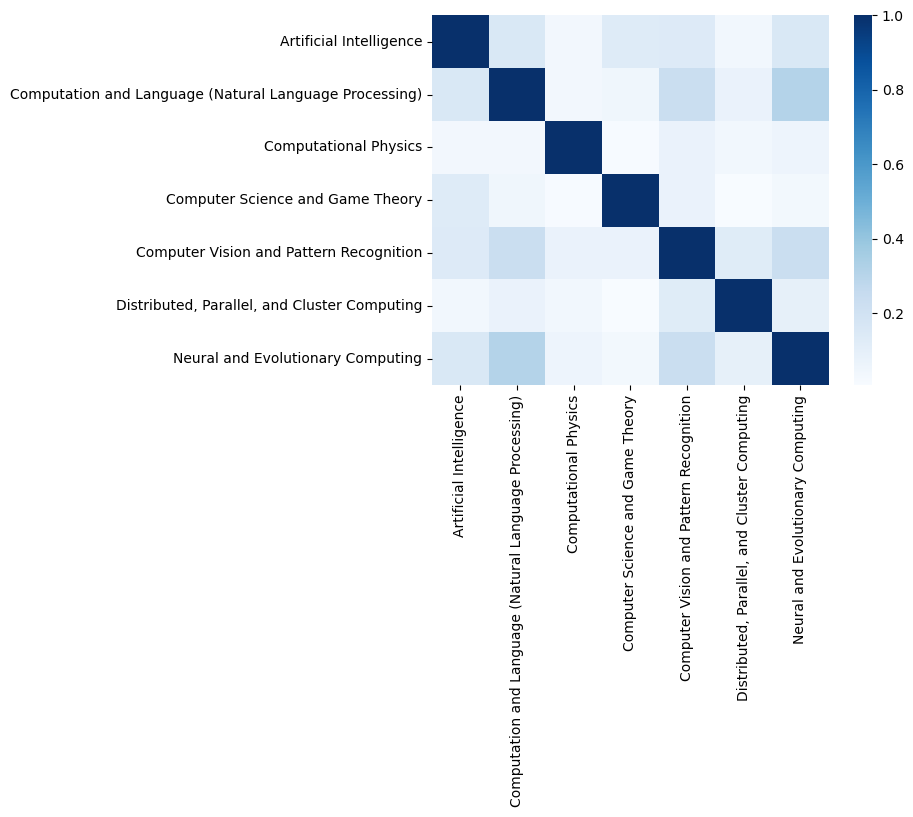

In [468]:
import seaborn as sb
sb.heatmap(corr_df.corr(), cmap='Blues')

In [469]:
corr_df.corr()

,Artificial Intelligence,Computation and Language (Natural Language Processing),Computational Physics,Computer Science and Game Theory,Computer Vision and Pattern Recognition,"Distributed, Parallel, and Cluster Computing",Neural and Evolutionary Computing
Artificial Intelligence,1.000000,0.155681,0.038029,0.133881,0.136051,0.039744,0.155110
Computation and Language (Natural Language Processing),0.155681,1.000000,0.036319,0.046407,0.234687,0.075669,0.310601
Computational Physics,0.038029,0.036319,1.000000,0.012105,0.077075,0.040957,0.058090
Computer Science and Game Theory,0.133881,0.046407,0.012105,1.000000,0.075945,0.007508,0.030968
Computer Vision and Pattern Recognition,0.136051,0.234687,0.077075,0.075945,1.000000,0.124327,0.235984
"Distributed, Parallel, and Cluster Computing",0.039744,0.075669,0.040957,0.007508,0.124327,1.000000,0.093627
Neural and Evolutionary Computing,0.155110,0.310601,0.058090,0.030968,0.235984,0.093627,1.000000


In [470]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
from skforecast.ForecasterAutoregMultiSeries import ForecasterAutoregMultiSeries

In [471]:
data = corr_df.iloc[:, 0:7].fillna(0)

In [472]:
data

,Artificial Intelligence,Computation and Language (Natural Language Processing),Computational Physics,Computer Science and Game Theory,Computer Vision and Pattern Recognition,"Distributed, Parallel, and Cluster Computing",Neural and Evolutionary Computing
published_date,,,,,,,
1993-08-01,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-09-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-11-01,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-12-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1994-01-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-26,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-27,12.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-28,0.0,0.0,0.0,0.0,1.0,0.0,5.0


In [473]:
sk_with_date = copy.query('category.isin(@comp_topics)').groupby(['published_date', 'category']).size().reset_index(name='count').query("count > 0")
cn = pd.Series(pd.unique(sk_with_date.category)).sort_values()
sk_df = sk_with_date.pivot_table(index='published_date', columns='category', fill_value=0)
sk_df.columns = cn
display(sk_df)

,Artificial Intelligence,Computation and Language (Natural Language Processing),Computational Physics,Computer Science and Game Theory,Computer Vision and Pattern Recognition,"Distributed, Parallel, and Cluster Computing",Neural and Evolutionary Computing
published_date,,,,,,,
1993-08-01,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-09-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-11-01,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-12-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1994-01-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-25,2.0,0.0,0.0,0.0,0.0,0.0,1.0
2025-01-27,4.0,0.0,0.0,0.0,1.0,0.0,2.0
2025-01-28,2.0,0.0,0.0,0.0,0.0,0.0,3.0


In [474]:
sk_df['month'] = sk_df.index.month
sk_df['year'] = sk_df.index.year

date_ind = sk_df[['month', 'year']].astype(int).astype(str)
month_yr = date_ind['month'] + "/" + date_ind['year']
month_yr = dates_from_str(month_yr)
forecast_data = sk_df.iloc[:, 0:7]
forecast_data.index = pd.DatetimeIndex(month_yr).to_period('M')
forecast_data = forecast_data.diff().dropna()
#Note here that this is based on differences (values not are direct counts)
display(forecast_data)

,Artificial Intelligence,Computation and Language (Natural Language Processing),Computational Physics,Computer Science and Game Theory,Computer Vision and Pattern Recognition,"Distributed, Parallel, and Cluster Computing",Neural and Evolutionary Computing
1993-09,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-11,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-12,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
1994-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1994-02,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2025-01,-2.0,0.0,0.0,0.0,0.0,0.0,-3.0
2025-01,2.0,0.0,0.0,0.0,1.0,0.0,1.0
2025-01,-2.0,0.0,0.0,0.0,-1.0,0.0,1.0
2025-01,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0


In [475]:
np.floor(forecast_data.shape[0] * 0.3)
f_train = forecast_data[:-1985]
f_test = forecast_data[-1985:]

In [476]:
model = VAR(train)
lag = model.select_order(30)
lag.selected_orders

#Using this to gauge the number of lags we use later, selecting 9

{'aic': np.int64(30),
 'bic': np.int64(7),
 'hqic': np.int64(13),
 'fpe': np.int64(30)}

In [477]:
forecaster = ForecasterAutoregMultiSeries(
                 regressor          = LGBMRegressor(random_state=0, verbose=-1),
                 lags               = 13,
                 encoding           = 'ordinal',
                 transformer_series = None,
                 transformer_exog   = None,
                 weight_func        = None,
                 series_weights     = None,
                 differentiation    = None,
                 dropna_from_series = False,
                 fit_kwargs         = None,
                 forecaster_id      = None
             )

forecaster.fit(series=f_train)
forecaster

/home/narenprax/Documents/VSCode Projects/stats140finalproj/.pixi/envs/default/lib/python3.13/site-packages/skforecast/utils/utils.py:1135: UserWarning:

Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.



ForecasterAutoregMultiSeries 
Regressor: LGBMRegressor(random_state=0, verbose=-1) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13] 
Transformer for series: None 
Transformer for exog: None 
Series encoding: ordinal 
Window size: 13 
Series levels (names): Artificial Intelligence, Computation and Language (Natural Language Processing), Computational Physics, Computer Science and Game Theory, Computer Vision and Pattern Recognition, ... 
Series weights: None 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: 'Artificial Intelligence': ['0', '4631'], 'Computation and Language (Natural Language Processing)': ['0', '4631'], 'Computational Physics': ['0', '4631'], ... 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: boosting_type: gbdt, class_weight: None, colsample_bytree: 1.0, importance_type: split, learning_rate: 0.1, ... 
fit_kwarg

In [478]:
test_preds = forecaster.predict(
    levels            = list(forecast_data.columns), 
    steps             = len(f_test), 
    suppress_warnings = False
)

In [479]:
mean_absolute_error(test_preds, f_test)

2.0294532035701898

In [480]:
future_forecast = ForecasterAutoregMultiSeries(
                 regressor          = LGBMRegressor(random_state=0, verbose=-1),
                 lags               = 13,
                 encoding           = 'ordinal',
                 transformer_series = None,
                 transformer_exog   = None,
                 weight_func        = None,
                 series_weights     = None,
                 differentiation    = None,
                 dropna_from_series = False,
                 fit_kwargs         = None,
                 forecaster_id      = None
             )

future_forecast.fit(series=forecast_data)
future_forecast

/home/narenprax/Documents/VSCode Projects/stats140finalproj/.pixi/envs/default/lib/python3.13/site-packages/skforecast/utils/utils.py:1135: UserWarning:

Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.



ForecasterAutoregMultiSeries 
Regressor: LGBMRegressor(random_state=0, verbose=-1) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13] 
Transformer for series: None 
Transformer for exog: None 
Series encoding: ordinal 
Window size: 13 
Series levels (names): Artificial Intelligence, Computation and Language (Natural Language Processing), Computational Physics, Computer Science and Game Theory, Computer Vision and Pattern Recognition, ... 
Series weights: None 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: 'Artificial Intelligence': ['0', '6616'], 'Computation and Language (Natural Language Processing)': ['0', '6616'], 'Computational Physics': ['0', '6616'], ... 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: boosting_type: gbdt, class_weight: None, colsample_bytree: 1.0, importance_type: split, learning_rate: 0.1, ... 
fit_kwarg

In [481]:
future_preds = future_forecast.predict(
    levels            = list(forecast_data.columns), 
    steps             = 6, 
    suppress_warnings = False
)

In [482]:
preds_long = future_preds.reset_index().melt(id_vars=['index'], var_name='Category', value_name='Predicted Difference')
preds_long.rename(columns={'index': 'Time'}, inplace=True)
preds_long.Time -= 6616
display(preds_long)

,Time,Category,Predicted Difference
0,1,Artificial Intelligence,1.529155
1,2,Artificial Intelligence,0.154338
2,3,Artificial Intelligence,-0.637182
3,4,Artificial Intelligence,0.433543
4,5,Artificial Intelligence,-0.258543
5,6,Artificial Intelligence,0.419994
6,1,Computation and Language (Natural Language Pro...,-0.592986
7,2,Computation and Language (Natural Language Pro...,0.316593
8,3,Computation and Language (Natural Language Pro...,-0.441984
9,4,Computation and Language (Natural Language Pro...,0.372076


In [483]:
avg_pred = preds_long.groupby(['Category'])['Predicted Difference'].mean().reset_index()
px.bar(avg_pred, x = 'Category', y = 'Predicted Difference', color = 'Category')

In [484]:
topics = pd.unique(preds_long['Category'])
for x in topics:
    fig = px.line(preds_long.query("Category == @x"), x = "Time", y = "Predicted Difference", color_discrete_sequence=[color_dict[x]], title="Predicted differences in paper output in the next 6 months : " + x)
    fig.show()